## GRADUATE ADMISSION PREDICTION

### Problem statement-: Students face problem in choosing right university or college based on their marks and other parameters. Many students apply for the universities in which they have little chance of acceptance. This leads students to frustration and they lose money just for applying to those universities

### Objective-:Objective is to predict the chance of admission of a new candidate based on some features(GRE score , TOEFL score , CGPA , University Rating , LOR , SOP, Research experience).


In [10]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv("admission_data.csv")

In [12]:
df.shape

(500, 8)

In [13]:
df.size

4000

In [15]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [17]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Data Preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


> All our data is in required format.

In [20]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### there is no missing value in our dataset.

In [21]:
df.duplicated().sum()

0

### duplicate rows are not present in our dataset.

### our dataset has not any missing value and it does not have duplicate data.All columns are in required format.Hence data is clean.

## EDA

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

### Q- What are the attributes in the dataset?

In [23]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Q- What are the maximum and minimum GRE score ?


In [24]:
df['GRE Score'].max()

340

> maximum GRE score is 340.

In [25]:
df['GRE Score'].min()

290

> minimum GRE score is 290.

### Q- What is the average GRE score?

In [26]:
df['GRE Score'].mean()

316.472

> Average GRE score is 316.472

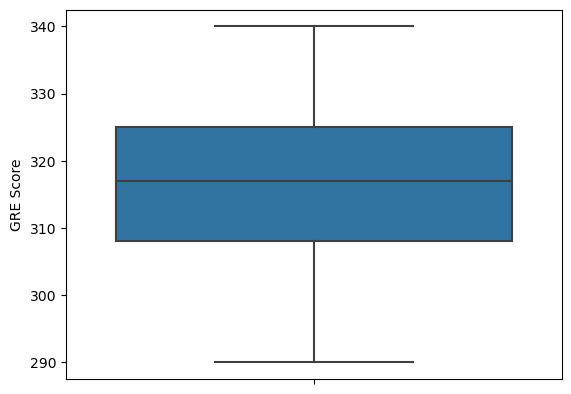

In [27]:
sns.boxplot(y="GRE Score",data=df)
plt.show()

### Q- What are maximum and minimum TOEFL score?What is the average TOEFL score?

In [28]:
df['TOEFL Score'].max()

120

In [29]:
df['TOEFL Score'].min()

92

> maximum TOEFL score is 120.Minimum TOEFL score is 92.

In [30]:
df['TOEFL Score'].mean()

107.192

> average TOEFL score is 107.192.

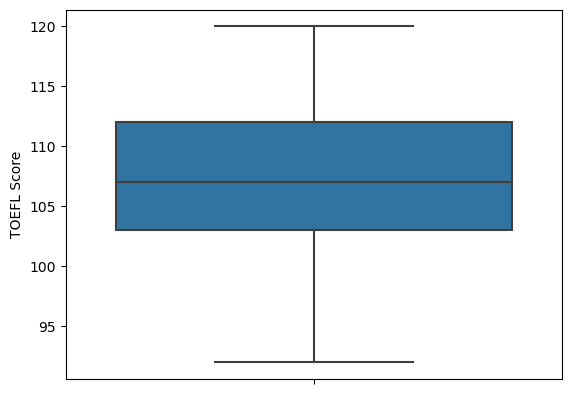

In [31]:
sns.boxplot(y="TOEFL Score",data=df)
plt.show()

### Q-What are the maximum and minimum CGPA?What is the average CGPA?



In [32]:
df['CGPA'].max()

9.92

In [33]:
df['CGPA'].min()

6.8

> maximum cgpa is 9.92 and minimum cgpa is 6.8

In [34]:
df['CGPA'].mean()

8.576440000000003

> average cgpa is 8.58

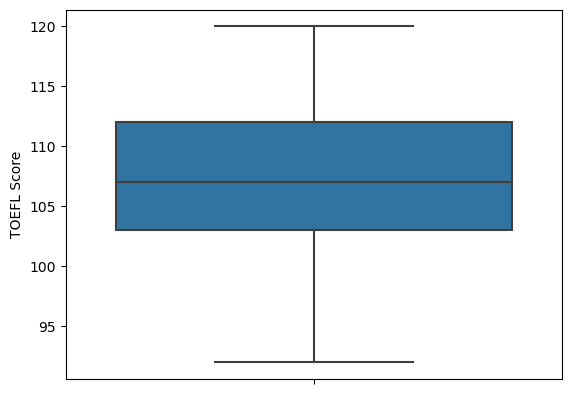

In [35]:
sns.boxplot(y="TOEFL Score",data=df)
plt.show()

### Q-How many students have research experience?

In [36]:
df.groupby("Research").size()

Research
0    220
1    280
dtype: int64

> 280 students have research experience.

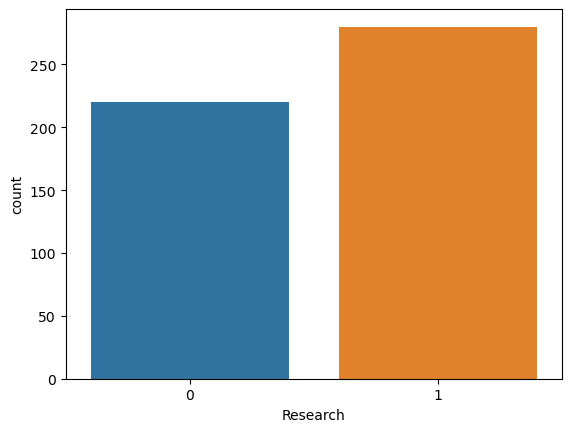

In [37]:
sns.countplot(x='Research',data=df)
plt.show()

> the number of students who have research experience are high.

### Check relation between Research and University rating.

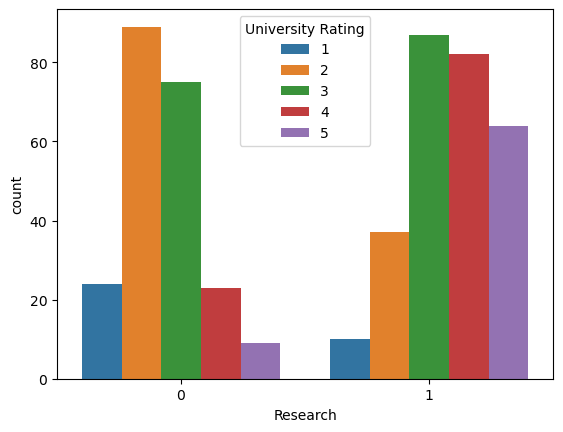

In [38]:
sns.countplot(x='Research',hue='University Rating',data=df)
plt.show()

> those students who have reasearch experience applied for univristies which have higher rating.
> those students who does not have research experience applied for universities which have low rating(mostly 2 star rating).

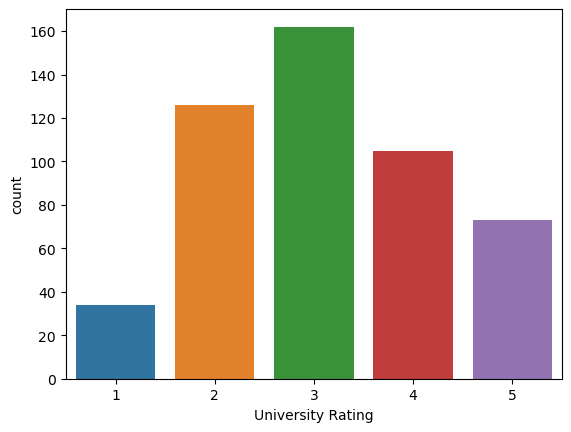

In [39]:
sns.countplot(x='University Rating',data=df)
plt.show()

### Q- What is the relation between CGPA and Chance of Admission?

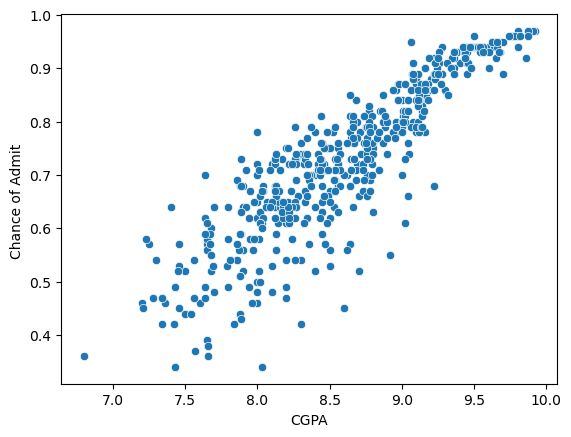

In [40]:
sns.scatterplot(x="CGPA",y="Chance of Admit ",data=df)
plt.show()

#### As CGPA increases the chance of admission also increases.

### Q- What is the relation between GRE score and Chance of Admit.

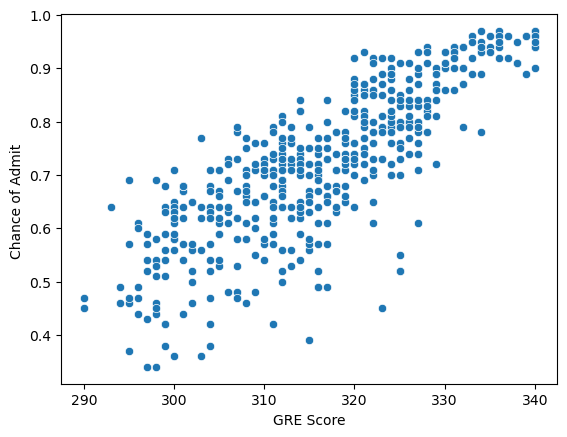

In [41]:
sns.scatterplot(x="GRE Score",y="Chance of Admit ",data=df)
plt.show()

> when GRE Score increses Chance of Admission also increases.

### What is the relation between TOEFL Score and Chance of Admission?

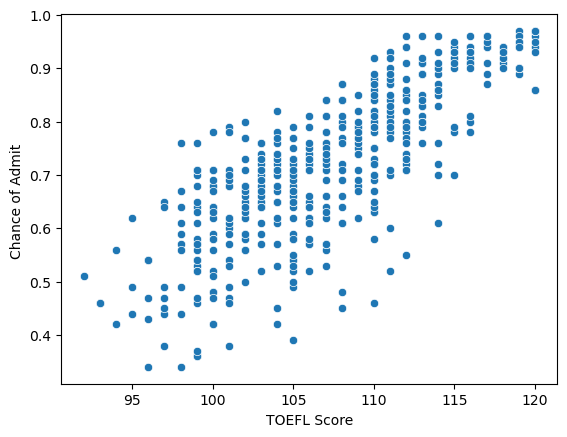

In [42]:
sns.scatterplot(x='TOEFL Score',y='Chance of Admit ',data=df)
plt.show()

> If TOEFL Score increases then Chance of admission also increases.

### Q- Does Letter of recomendation affects the Chance of admit?

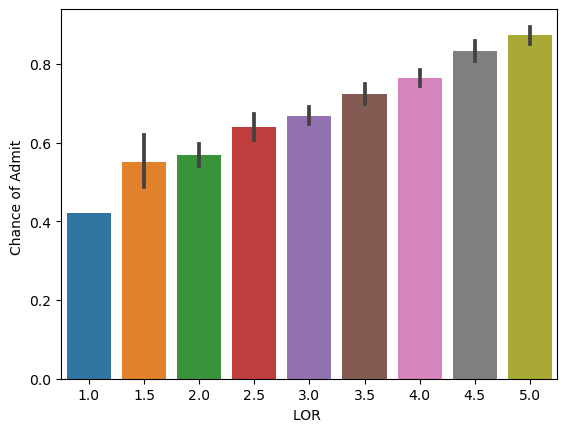

In [43]:
sns.barplot(x="LOR ",y="Chance of Admit ",data=df)
plt.show()

In [44]:
df1 = df.groupby(['LOR ','Chance of Admit ']).mean()

In [45]:
df1

GRE Score  TOEFL Score  University Rating       SOP  \
LOR  Chance of Admit                                                          
1.0  0.42              299.000000    94.000000           1.000000  1.000000   
1.5  0.37              295.000000    99.000000           1.000000  2.000000   
     0.43              297.000000    96.000000           2.000000  2.500000   
     0.49              294.000000    95.000000           1.000000  1.500000   
     0.50              302.000000   102.000000           1.000000  2.000000   
...                           ...          ...                ...       ...   
5.0  0.93              327.250000   116.250000           4.750000  4.875000   
     0.94              332.333333   116.777778           4.888889  4.722222   
     0.95              338.000000   120.000000           4.000000  5.000000   
     0.96              337.600000   115.800000           4.600000  5.000000   
     0.97              334.000000   120.000000           5.000000  4.000000   

                           CGPA  Research  
LOR  Chance of Admit                       
1.0  0.42              7.340000       0.0  
1.5  0.37              7.570000       0.0  
     0.43              7.890000       0.0  
     0.49              7.640000       0.0  
     0.50              8.000000       0.0  
...                         ...       ...  
5.0  0.93              9.515000       1.0  
     0.94              9.526667       1.0  
     0.95              9.660000       1.0  
     0.96              9.738000       1.0  
     0.97              9.870000       1.0  

[241 rows x 6 columns]

> as strength of letter of recommendation increases then chance of admission also increses.

### Q- Check relation between SOP and University Rating


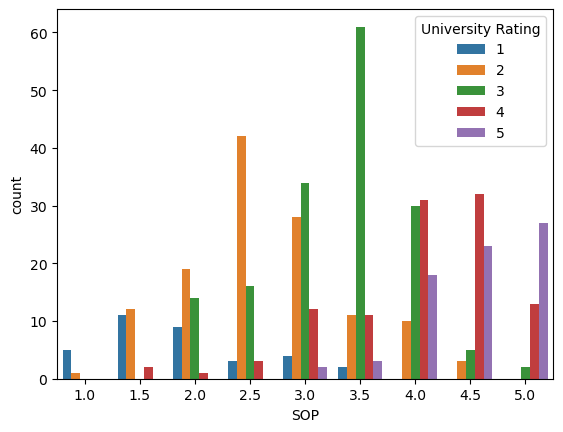

In [46]:
sns.countplot(x="SOP",hue="University Rating",data=df)
plt.show()

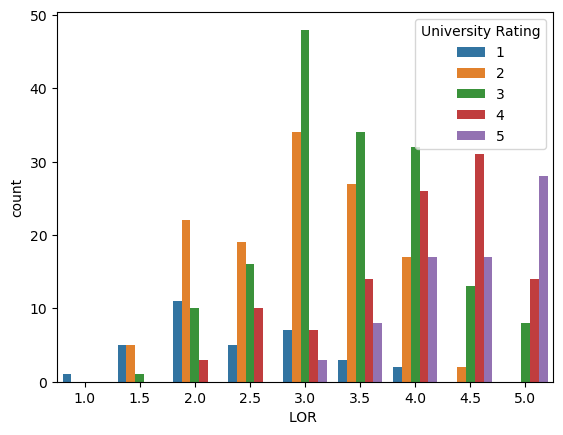

In [47]:
sns.countplot(x="LOR ",hue="University Rating",data=df)
plt.show()

### How is the distribution student applications across the various universities based on rating?


<AxesSubplot:ylabel='University Rating'>

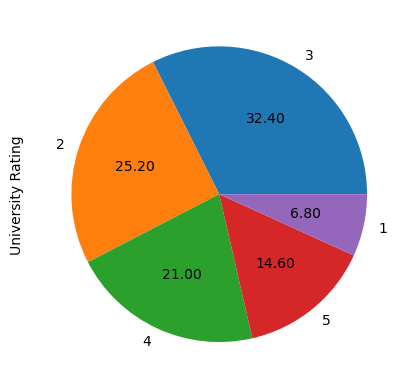

In [48]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%.2f')


### Is there any relation between features?

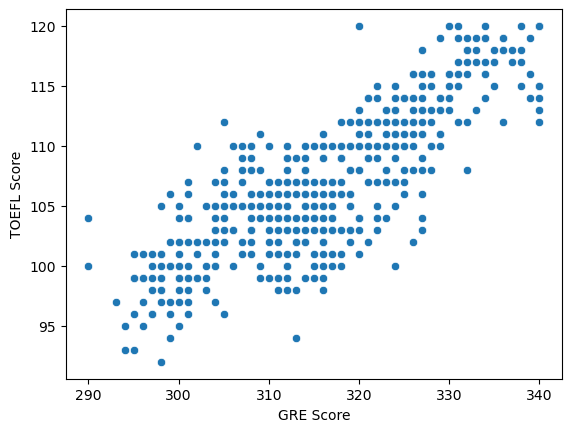

In [49]:
sns.scatterplot(x="GRE Score",y="TOEFL Score",data=df)
plt.show()


> those student have maximum GRE score also have maximum TOEFL Score.

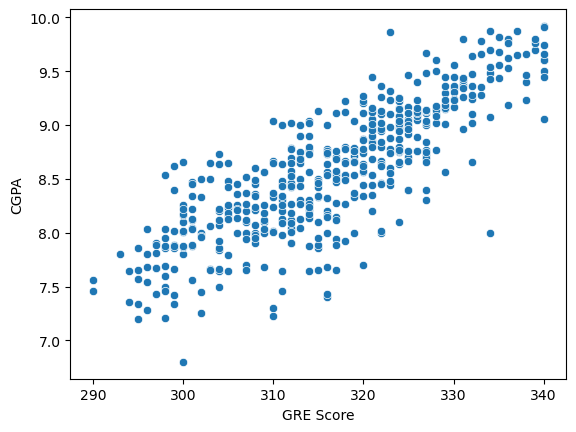

In [50]:
sns.scatterplot(x="GRE Score",y="CGPA",data=df)
plt.show()

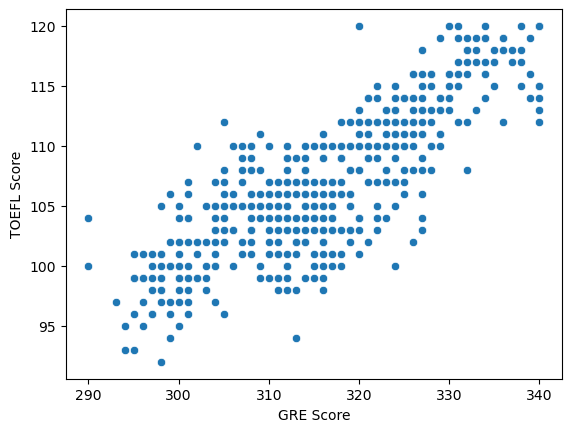

In [51]:
sns.scatterplot(x="GRE Score",y="TOEFL Score",data=df)
plt.show()

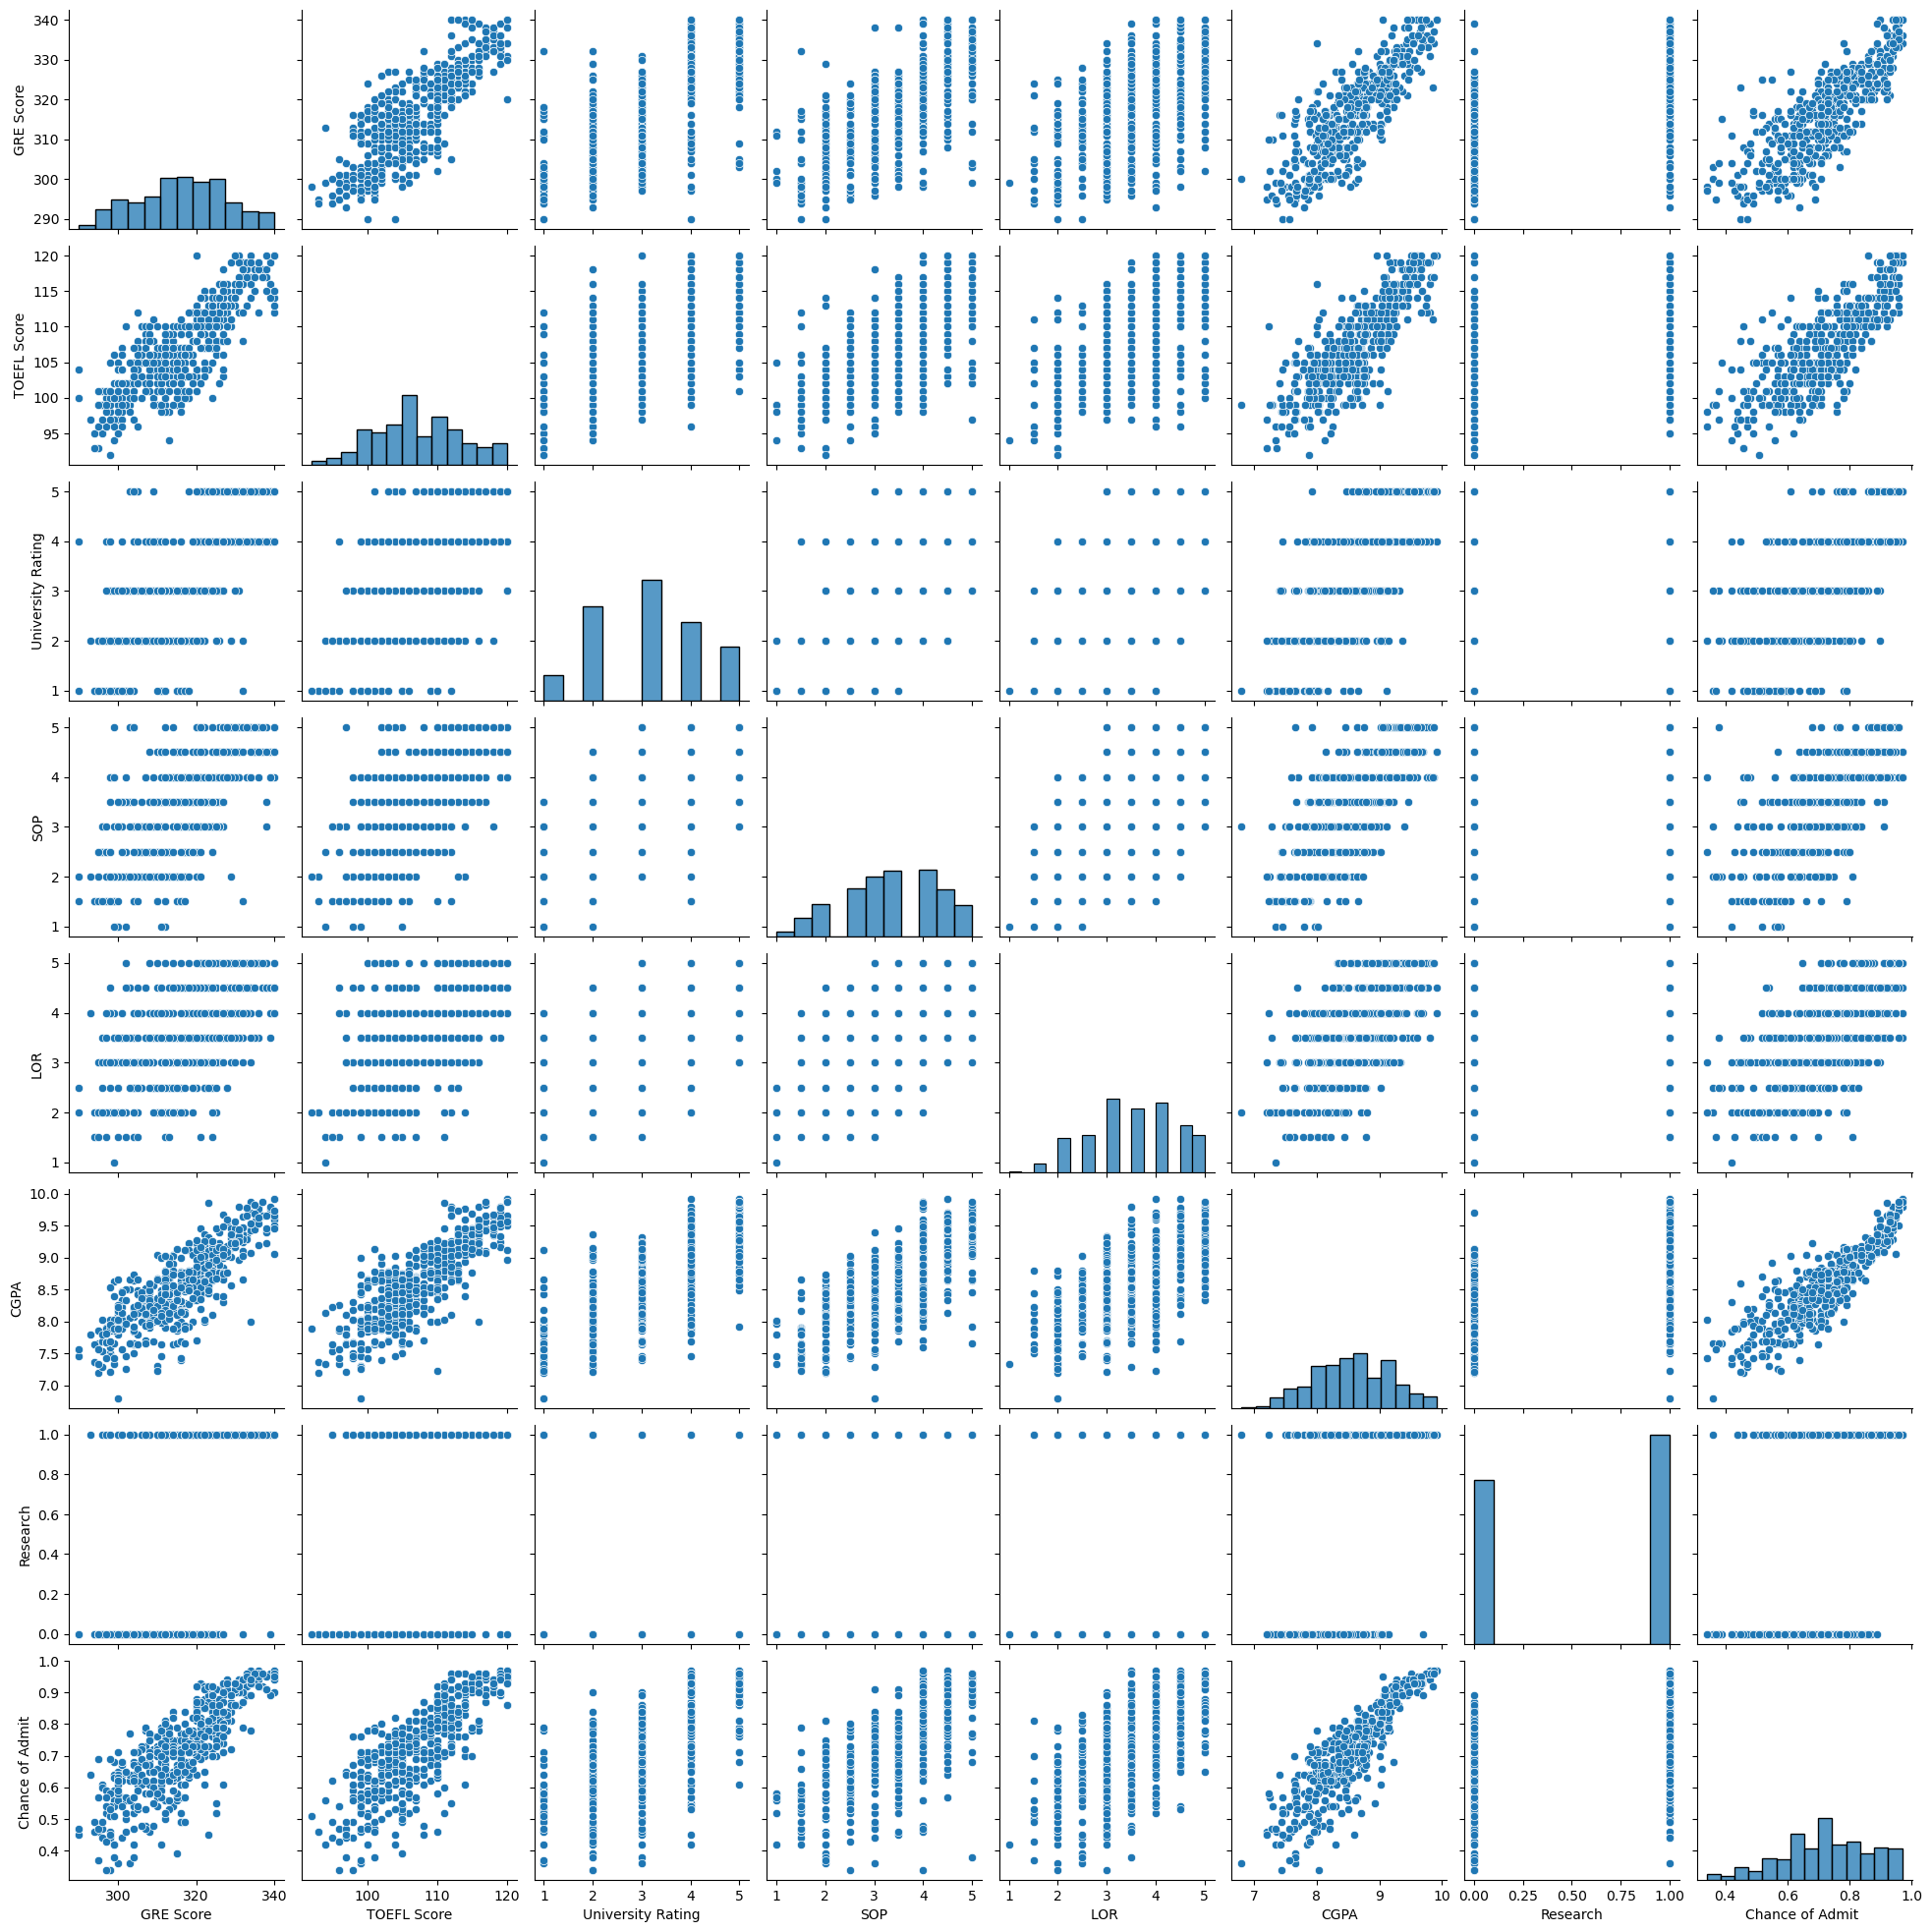

In [52]:
sns.pairplot(df)

# Model Training

In [53]:
data1=df

In [54]:
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [55]:
x=data1.iloc[:,0:-1].values
y=data1.iloc[:,-1].values

In [56]:
x.size


3500

In [57]:
x.shape


(500, 7)

In [58]:
y.size

500

In [59]:
y.shape

(500,)

In [60]:
y.reshape(-1,1)

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

## train test splitting of Data

In [61]:
from sklearn.model_selection import train_test_split


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [93]:
x_train

array([[328.  , 110.  ,   4.  , ...,   4.  ,   9.14,   1.  ],
       [340.  , 115.  ,   5.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       ...,
       [322.  , 114.  ,   5.  , ...,   4.  ,   8.94,   1.  ],
       [307.  , 105.  ,   2.  , ...,   3.5 ,   8.1 ,   0.  ],
       [309.  , 111.  ,   2.  , ...,   4.  ,   8.03,   0.  ]])

In [94]:
y_train

array([0.82, 0.94, 0.67, 0.47, 0.85, 0.74, 0.74, 0.91, 0.42, 0.46, 0.79,
       0.91, 0.62, 0.79, 0.56, 0.92, 0.79, 0.72, 0.59, 0.92, 0.8 , 0.73,
       0.63, 0.96, 0.82, 0.74, 0.46, 0.87, 0.56, 0.84, 0.76, 0.74, 0.93,
       0.47, 0.83, 0.46, 0.84, 0.86, 0.79, 0.87, 0.66, 0.54, 0.79, 0.55,
       0.87, 0.56, 0.82, 0.8 , 0.68, 0.52, 0.8 , 0.36, 0.71, 0.7 , 0.68,
       0.86, 0.73, 0.58, 0.8 , 0.7 , 0.66, 0.61, 0.72, 0.96, 0.53, 0.95,
       0.78, 0.93, 0.77, 0.77, 0.67, 0.69, 0.55, 0.46, 0.59, 0.81, 0.68,
       0.89, 0.64, 0.65, 0.77, 0.61, 0.96, 0.93, 0.57, 0.89, 0.7 , 0.68,
       0.88, 0.73, 0.86, 0.85, 0.83, 0.91, 0.73, 0.73, 0.65, 0.65, 0.77,
       0.57, 0.76, 0.89, 0.75, 0.69, 0.62, 0.67, 0.44, 0.84, 0.94, 0.37,
       0.65, 0.84, 0.73, 0.62, 0.5 , 0.89, 0.93, 0.78, 0.66, 0.61, 0.57,
       0.8 , 0.81, 0.71, 0.64, 0.38, 0.73, 0.78, 0.65, 0.8 , 0.81, 0.59,
       0.71, 0.77, 0.86, 0.76, 0.8 , 0.84, 0.8 , 0.9 , 0.62, 0.72, 0.96,
       0.68, 0.87, 0.75, 0.68, 0.56, 0.72, 0.9 , 0.

In [95]:
x_test

array([[321.  , 112.  ,   3.  ,   3.  ,   4.5 ,   8.95,   1.  ],
       [316.  , 110.  ,   3.  ,   4.  ,   4.5 ,   8.78,   1.  ],
       [324.  , 113.  ,   4.  ,   4.5 ,   4.  ,   8.79,   0.  ],
       [327.  , 104.  ,   5.  ,   3.  ,   3.5 ,   8.84,   1.  ],
       [299.  ,  94.  ,   1.  ,   1.  ,   1.  ,   7.34,   0.  ],
       [303.  , 100.  ,   2.  ,   3.  ,   3.5 ,   8.06,   1.  ],
       [339.  , 114.  ,   5.  ,   4.  ,   4.5 ,   9.76,   1.  ],
       [335.  , 118.  ,   5.  ,   4.5 ,   3.5 ,   9.44,   1.  ],
       [338.  , 118.  ,   4.  ,   3.  ,   4.5 ,   9.4 ,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ],
       [312.  , 103.  ,   3.  ,   5.  ,   4.  ,   8.45,   0.  ],
       [327.  , 103.  ,   3.  ,   4.  ,   4.  ,   8.3 ,   1.  ],
       [317.  , 103.  ,   2.  ,   2.5 ,   2.  ,   8.15,   0.  ],
       [340.  , 120.  ,   4.  ,   5.  ,   5.  ,   9.5 ,   1.  ],
       [324.  , 110.  ,   4.  ,   4.5 ,   4.  ,   9.15,   1.  ],
       [321.  , 109.  ,  

In [96]:
y_test

array([0.77, 0.69, 0.76, 0.71, 0.42, 0.64, 0.96, 0.93, 0.91, 0.8 , 0.76,
       0.74, 0.65, 0.96, 0.82, 0.75, 0.75, 0.81, 0.73, 0.9 , 0.92, 0.54,
       0.76, 0.56, 0.83, 0.73, 0.92, 0.72, 0.71, 0.64, 0.64, 0.93, 0.67,
       0.91, 0.54, 0.69, 0.89, 0.7 , 0.62, 0.71, 0.85, 0.64, 0.84, 0.65,
       0.66, 0.91, 0.62, 0.7 , 0.58, 0.54, 0.94, 0.73, 0.71, 0.94, 0.75,
       0.79, 0.73, 0.51, 0.58, 0.63, 0.97, 0.63, 0.91, 0.94, 0.84, 0.63,
       0.65, 0.7 , 0.68, 0.75, 0.82, 0.82, 0.62, 0.47, 0.97, 0.77, 0.73,
       0.68, 0.58, 0.54, 0.72, 0.86, 0.61, 0.79, 0.57, 0.78, 0.57, 0.71,
       0.76, 0.71, 0.86, 0.86, 0.72, 0.91, 0.78, 0.72, 0.49, 0.71, 0.92,
       0.67])

# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lregressor=LinearRegression()

In [99]:
lregressor.fit(x_train,y_train)

LinearRegression()

In [100]:
y_pred=lregressor.predict(x_test)

In [101]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [102]:
r2_score(y_test,y_pred)

0.8174673275904598

## r2 score of linear regression model is 0.90

In [103]:
mean_squared_error(y_test, y_pred, squared=False)

0.05450160883737917

### root mean squared error is 0.04

# Support vector regression

In [104]:
from sklearn.svm import SVR


In [105]:
svr=SVR()

In [106]:
svr.fit(x_train,y_train)

SVR()

In [107]:
r2_score(y_test, svr.predict(x_test))

0.6834228690038031

## r2 score of supoort vector machine is 0.6976

In [108]:
mean_squared_error(y_test,svr.predict(x_test), squared=False)

0.07177592296712179

### RMSE of SVR is 0.08

# Random Forest regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor


In [110]:
Rf_reg = RandomForestRegressor(random_state = 42)

In [111]:
Rf_reg.fit(x_train, y_train) 


RandomForestRegressor(random_state=42)

In [112]:
y_predR = Rf_reg.predict(x_test)

In [113]:
r2_score(y_test,y_predR)

0.8053947395103294

## r2 score of random forest regressor is 0.8417

In [114]:
mean_squared_error(y_test,y_predR, squared=False)

0.056275103731579214

### RMSE of random forest regressor is 0.058 

# XGBoost Regressor

In [115]:
from xgboost import XGBRegressor

In [116]:
XGB_reg = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)

In [117]:
XGB_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [118]:
y_predx =XGB_reg.predict(x_test)

In [119]:
r2_score(y_test,y_predx)

0.7408648772667428

## r2 score of XGBoost regressor model is 0.8031

In [120]:
mean_squared_error(y_test,y_predx, squared=False)

0.06493848562244242

### RMSE of XGBoost is 0.065

### Linear regession model have highest r2 score and lowest RMSE among all model.Hence we will select Linear regression model.

## Creating pickle file

In [91]:
import pickle

In [196]:
pickle.dump(lregressor,open('linearmodel.pkl','wb'))